Problem Statement - Part I

Assignment Part-I <br />
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklearn_metrics
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import os
import warnings
import math
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


<h4>Importing Data</hd>

In [2]:
train=pd.read_csv('C:/Users/madha/Downloads/train.csv')
train.shape

(1460, 81)

<h4>Missing Data Analysis </h4>

In [3]:
def missingValue(dataframe):
   missingDF=pd.DataFrame({"ColumnName":dataframe.columns,"MissingValuePercentage":['%.2f' % (a/len(dataframe)*100) for a in dataframe.isnull().sum()],
   "feature":["Continuous" if dataframe[col].dtype != 'O' else "Ordinal" for col in dataframe.columns ]}) 
   return missingDF
    

In [4]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
72        PoolQC                  99.52     Ordinal
74   MiscFeature                  96.30     Ordinal
6          Alley                  93.77     Ordinal
73         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electr

In [5]:
len(dt[dt["MissingValuePercentage"]!="0.00"])

19

In [6]:
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))
print("MiscFeature Unique:","\n",train.groupby('MiscFeature')["MiscFeature"].nunique().sort_values(ascending=False).reset_index(name="count"))
print(train.Alley.value_counts())


      ColumnName MissingValuePercentage     feature
72        PoolQC                  99.52     Ordinal
74   MiscFeature                  96.30     Ordinal
6          Alley                  93.77     Ordinal
73         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electr


We have 19 columns in the dataset in which we have missing values, So let's analyse those
<h5>Observations</h5>
PoolQC=>99.52 In the data_description.txt we found that na means No Pool in the houses and it seems that on the 99% cases we have PoolQC is na so we can drop this. <br />
MiscFeature 96.30 We can drop miscfeature column because there are only 4 unique values and rest are Null values 
<br />
Alley 93.77 We can replace nan with No alley access. <br />
Fence 80.75 We can replace nan with No Fence. <br />
FireplaceQu 47.26 We can replace nan with No_Fireplace <br />




In [7]:
train.drop(["MiscFeature","PoolQC"],inplace=True,axis=1)

In [8]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
6          Alley                  93.77     Ordinal
72         Fence                  80.75     Ordinal
64    GarageCond                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
60  GarageFinish                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
58    GarageType                   5.55     Ordinal
57   FireplaceQu                  47.26     Ordinal
35  BsmtFinType2                   2.60     Ordinal
32  BsmtExposure                   2.60     Ordinal
33  BsmtFinType1                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
30      BsmtQual                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
26    MasVnrArea                   0.55  Continuous
25    MasVnrType                   0.55     Ordinal
42    Electrical                   0.07     Ordinal


In [9]:
train.Alley.fillna("No_ALley",inplace=True)
train.Fence.fillna("No_Fence",inplace=True)
train.FireplaceQu.fillna("No_Fireplace",inplace=True)

In [10]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
3    LotFrontage                  17.74  Continuous
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


In [11]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

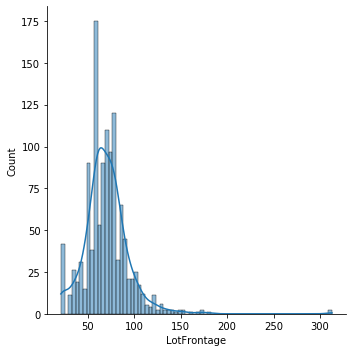

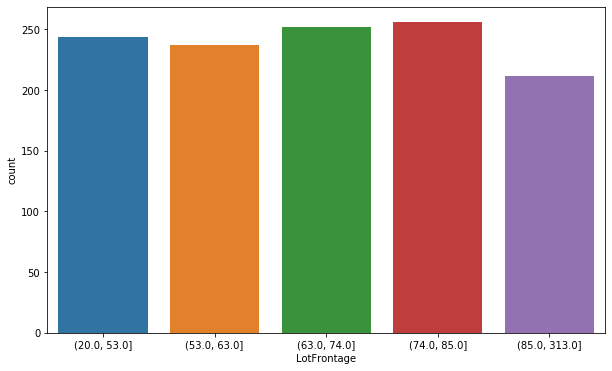

In [12]:
sns.displot(train.LotFrontage, kde=True)
plt.figure(figsize=(10, 6))
a = pd.qcut(train.LotFrontage, q=5, precision=0)
sns.countplot(a)

By looking into the chart we found that imputing null values with median will be good choice 

In [13]:
train.LotFrontage.fillna(train.LotFrontage.median(),inplace=True)

In [14]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
59   GarageYrBlt                   5.55  Continuous
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


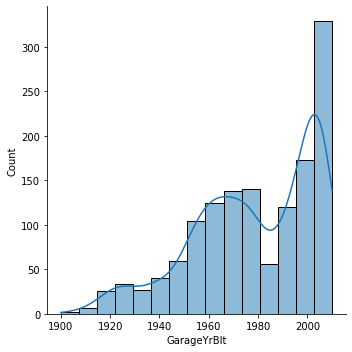

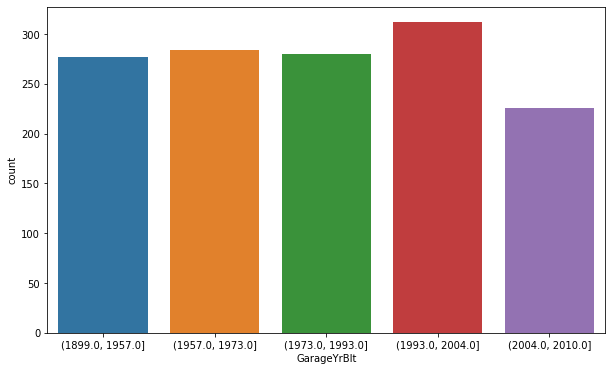

In [15]:
sns.displot(train.GarageYrBlt, kde=True)
plt.figure(figsize=(10, 6))
a = pd.qcut(train.GarageYrBlt, q=5, precision=0)
sns.countplot(a)

In [16]:
train.GarageYrBlt.fillna(train.GarageYrBlt.median(),inplace=True)

In [17]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage     feature
58    GarageType                   5.55     Ordinal
60  GarageFinish                   5.55     Ordinal
63    GarageQual                   5.55     Ordinal
64    GarageCond                   5.55     Ordinal
32  BsmtExposure                   2.60     Ordinal
35  BsmtFinType2                   2.60     Ordinal
30      BsmtQual                   2.53     Ordinal
31      BsmtCond                   2.53     Ordinal
33  BsmtFinType1                   2.53     Ordinal
25    MasVnrType                   0.55     Ordinal
26    MasVnrArea                   0.55  Continuous
42    Electrical                   0.07     Ordinal


In [18]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
train.MasVnrArea.fillna(train.MasVnrArea.median(),inplace=True)

In [20]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

      ColumnName MissingValuePercentage  feature
58    GarageType                   5.55  Ordinal
60  GarageFinish                   5.55  Ordinal
63    GarageQual                   5.55  Ordinal
64    GarageCond                   5.55  Ordinal
32  BsmtExposure                   2.60  Ordinal
35  BsmtFinType2                   2.60  Ordinal
30      BsmtQual                   2.53  Ordinal
31      BsmtCond                   2.53  Ordinal
33  BsmtFinType1                   2.53  Ordinal
25    MasVnrType                   0.55  Ordinal
42    Electrical                   0.07  Ordinal


As we can see we have list of all ordinal data so we can replace all the null values at one go

In [21]:
for a in dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False).ColumnName:
    train[a].fillna("No "+a,inplace=True)

In [22]:
dt=missingValue(train)
print(dt[dt["MissingValuePercentage"]!="0.00"].sort_values(by="MissingValuePercentage",ascending=False))

Empty DataFrame
Columns: [ColumnName, MissingValuePercentage, feature]
Index: []


In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_ALley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No_ALley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No_ALley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No_ALley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No_ALley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,2008,WD,Normal,250000


We can drop id as it contain uniqueness

In [24]:
train.drop("Id",inplace=True,axis=1)

EDA and Visualisation on cleaned data

In [25]:
continuous_list=[col for col in train.columns if train[col].dtype != 'O']
ordinal_list=[col for col in train.columns if train[col].dtype == 'O']

Text(0.5, 0.98, 'Ordinal vs Sale Price Analysis')

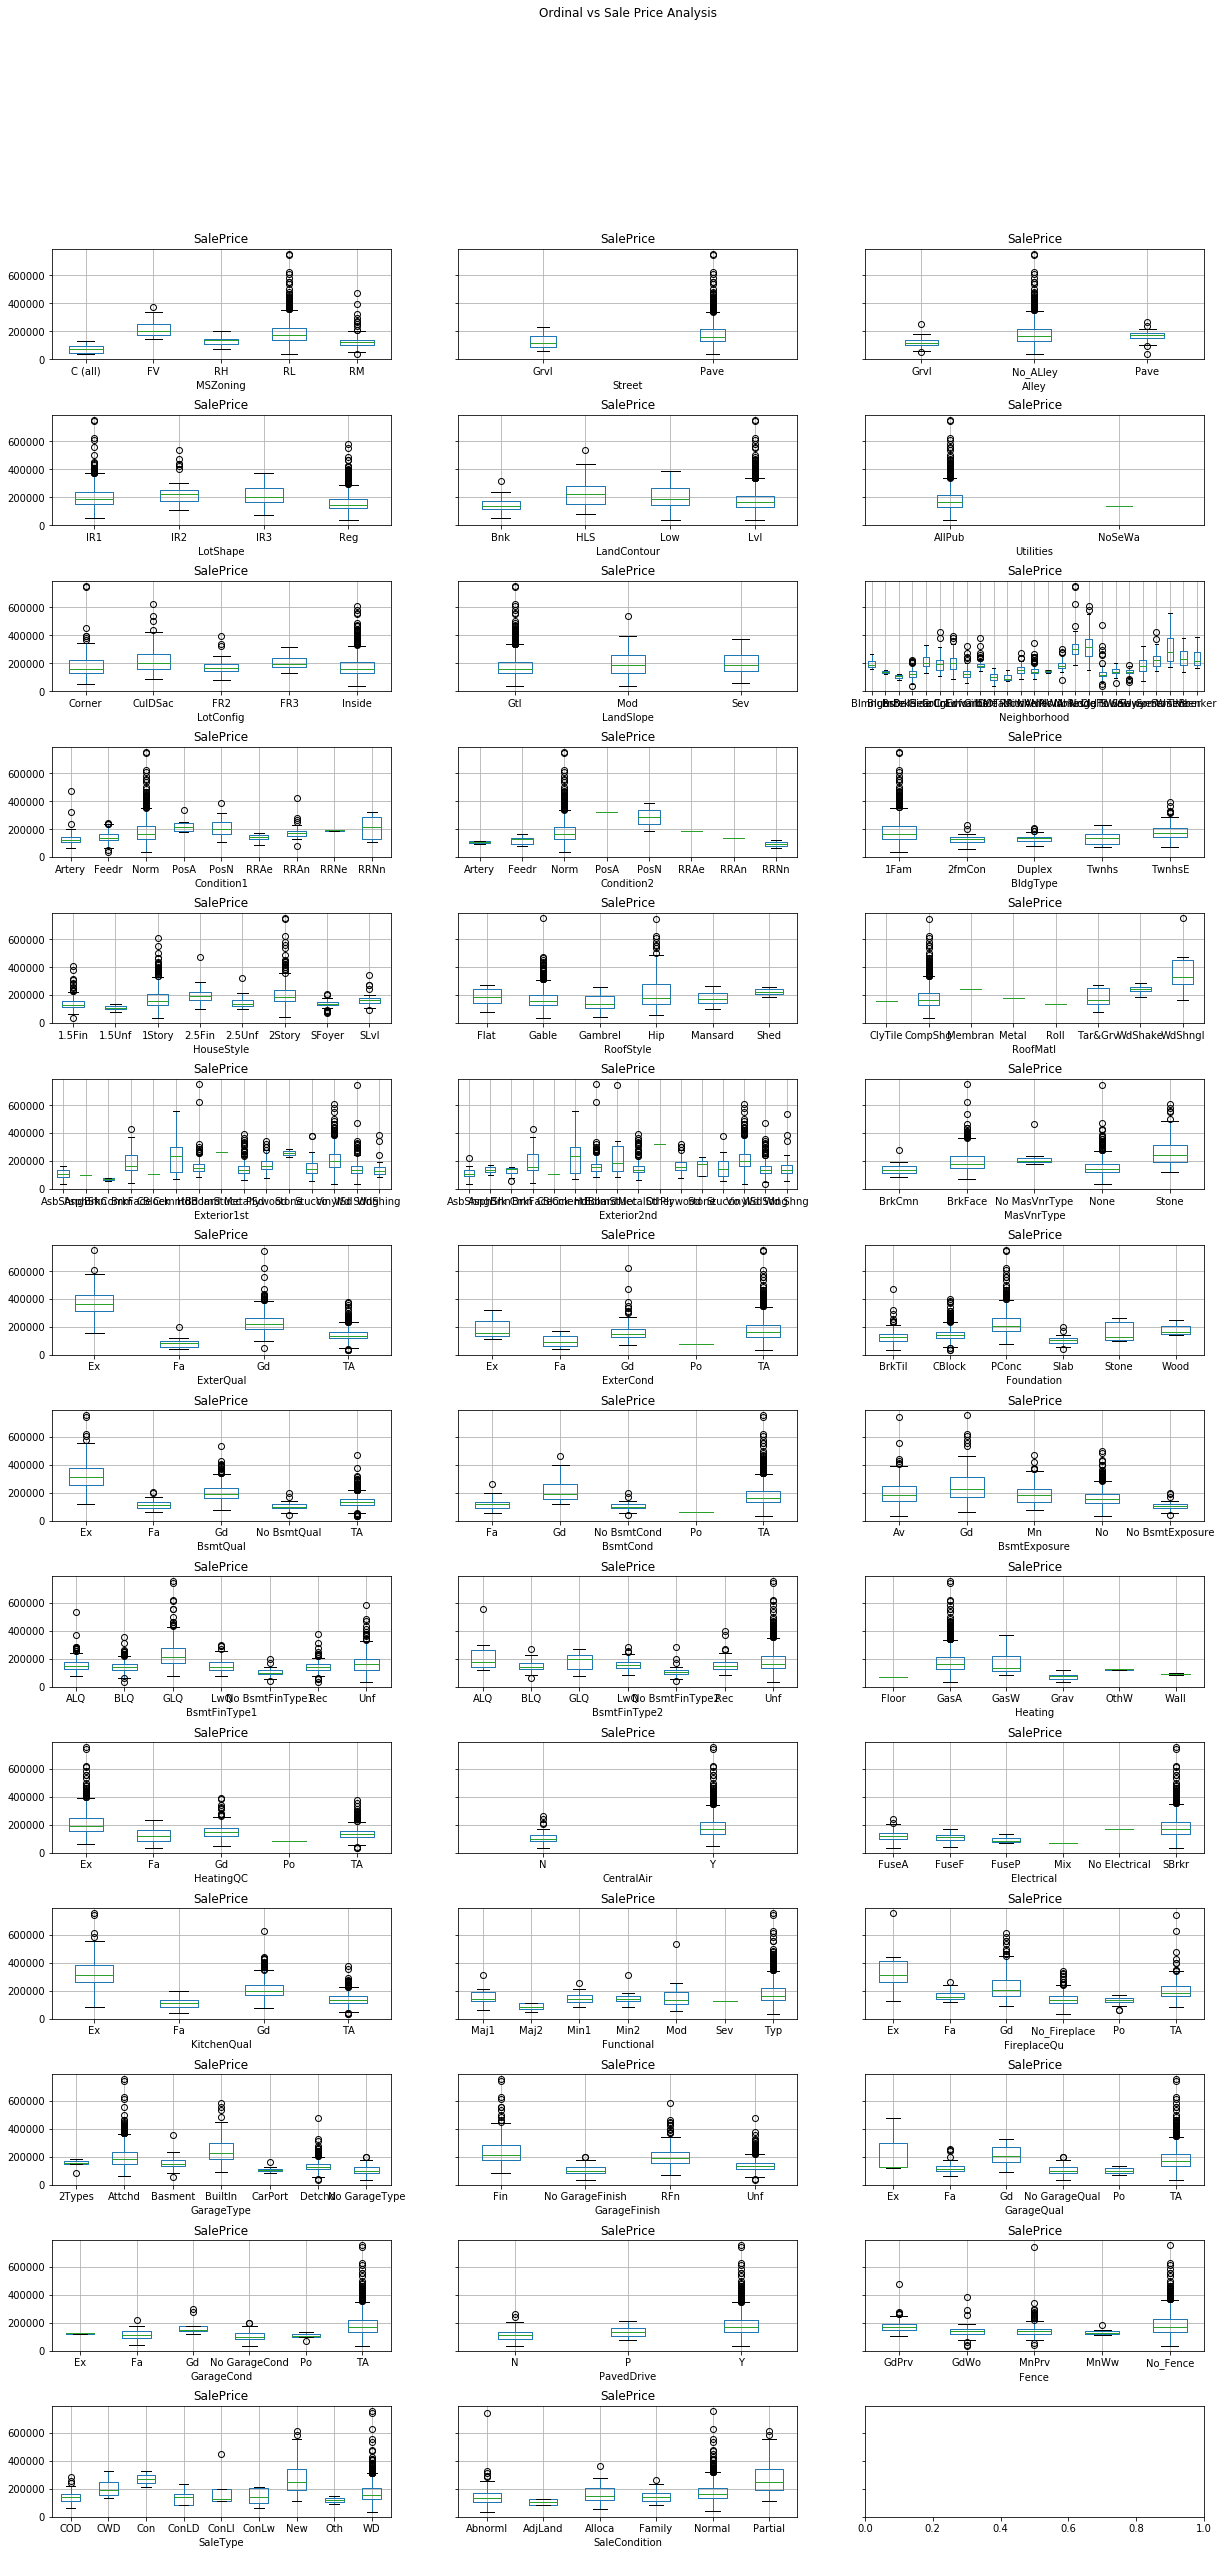

In [26]:

f, ax = plt.subplots(int(np.floor(len(ordinal_list)/3)+1), 3, 
                     figsize=(20, (np.floor(len(ordinal_list)/3)+1)*3),
                     sharey=True)
ax = np.ravel(ax)

plt.subplots_adjust(hspace=0.5)
for i in range(len(ordinal_list)):
    train.boxplot(column='SalePrice', by=ordinal_list[i], ax=ax[i])
plt.suptitle("Ordinal vs Sale Price Analysis")

Observation
* Houses which are near to Parks,Greenbeltsor any Offsite feature have High Sale Price

Text(0.5, 0.98, 'Continuous vs Sale Price Analysis')

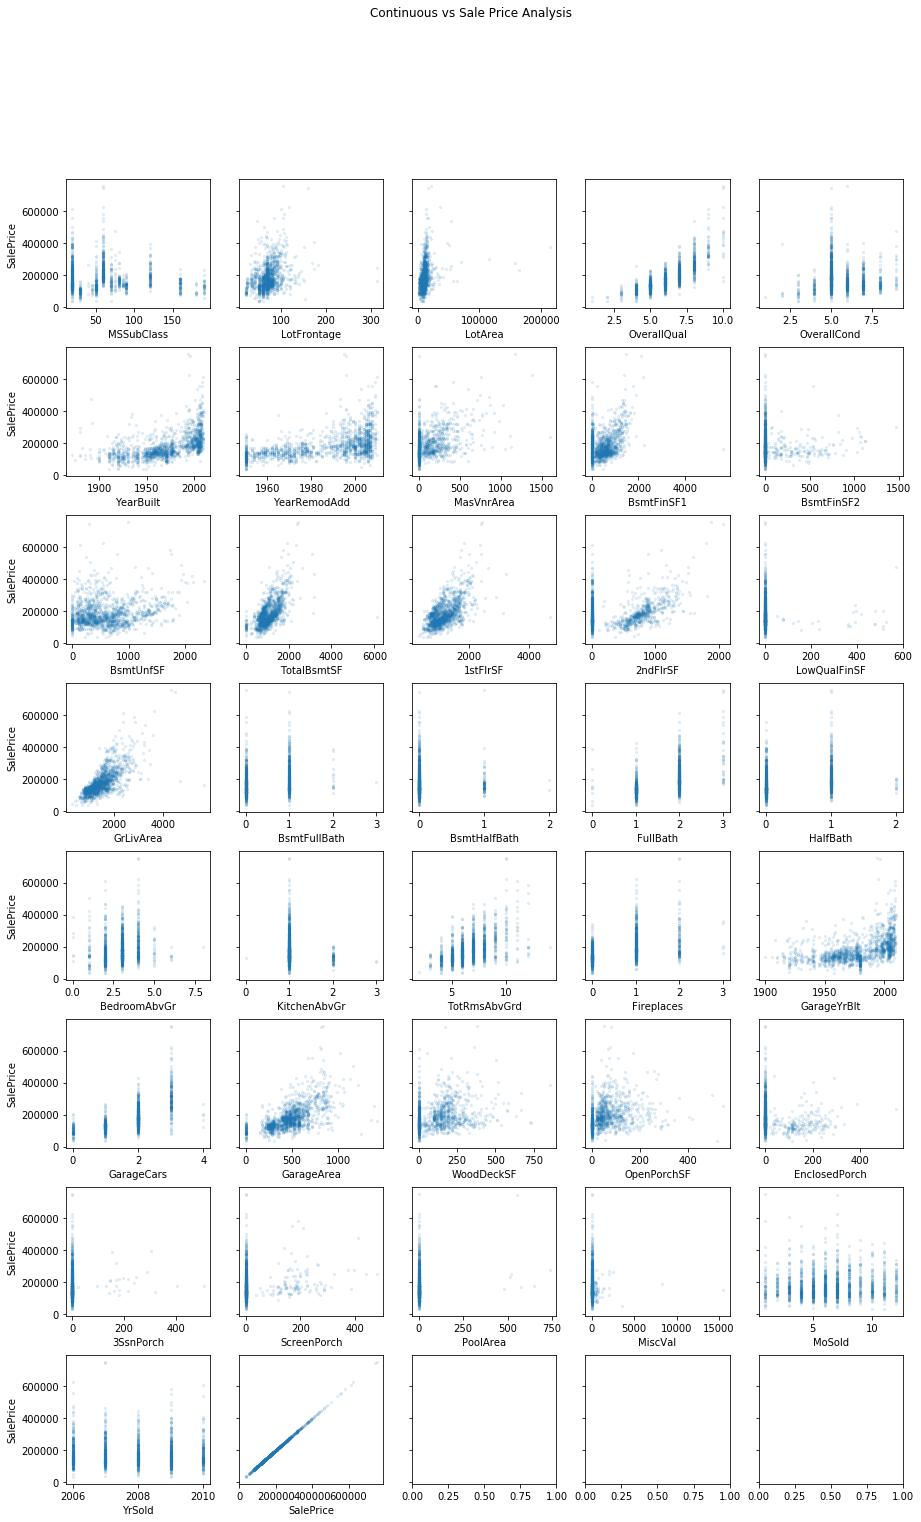

In [27]:
f, ax = plt.subplots(int(np.floor(len(continuous_list)/5))+1, 5, 
                     figsize=(15, int(np.floor(len(continuous_list)/5)+1)*3),
                     sharey=True)
ax = np.ravel(ax)

plt.subplots_adjust(hspace=0.3)

for i in range(len(continuous_list)):
    train.plot.scatter(x=continuous_list[i], y='SalePrice',
                      alpha=0.1, legend=True, s=5, ax=ax[i])
plt.suptitle("Continuous vs Sale Price Analysis")

Based on above figures saleprice seems to increase for houses that are recently build/modified. 

Observation
* Total Area of Basement,First Floor, Second Floor Areas and  total Basement Surface Area variable have the linear relationship with the Sale Price

<b>This means that the more these variables are in Quantity, the more is the Sale Price</b>

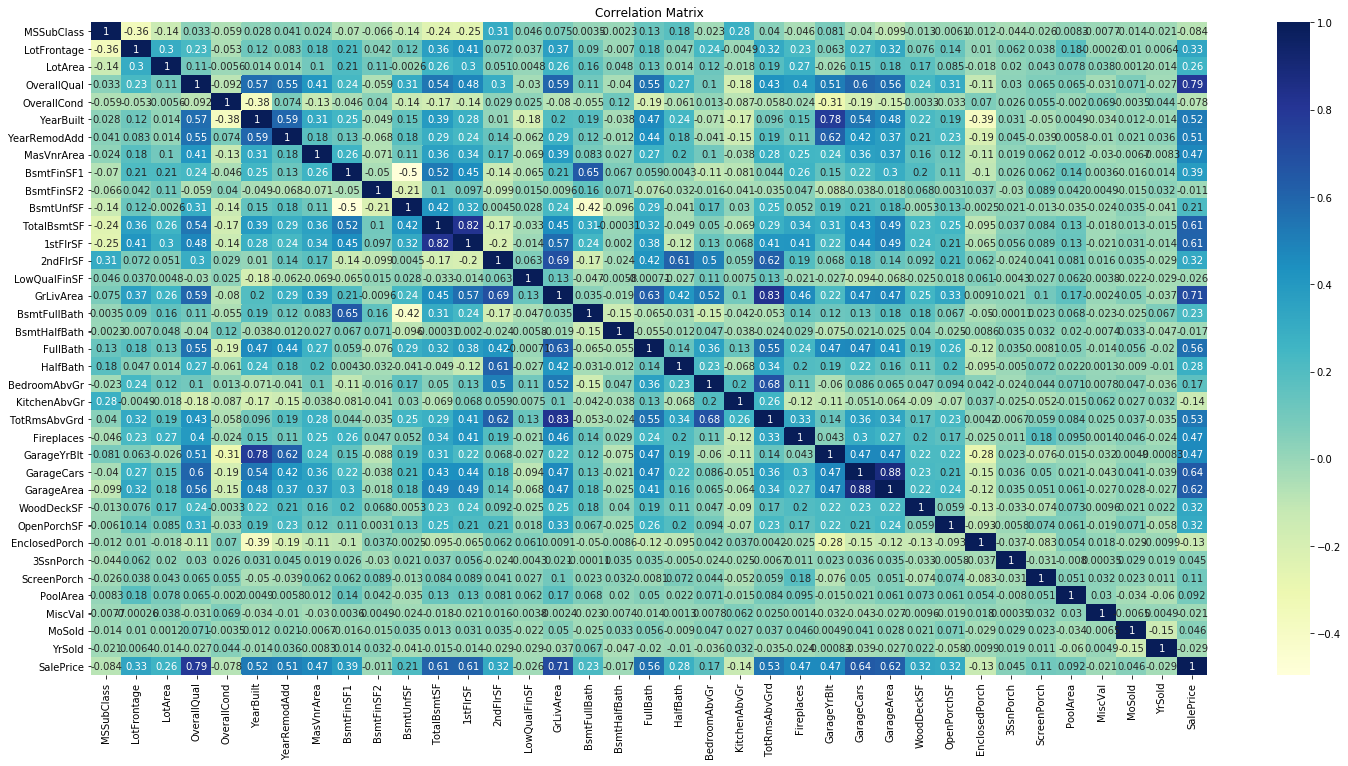

In [28]:
plt.figure(figsize = (25, 12))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

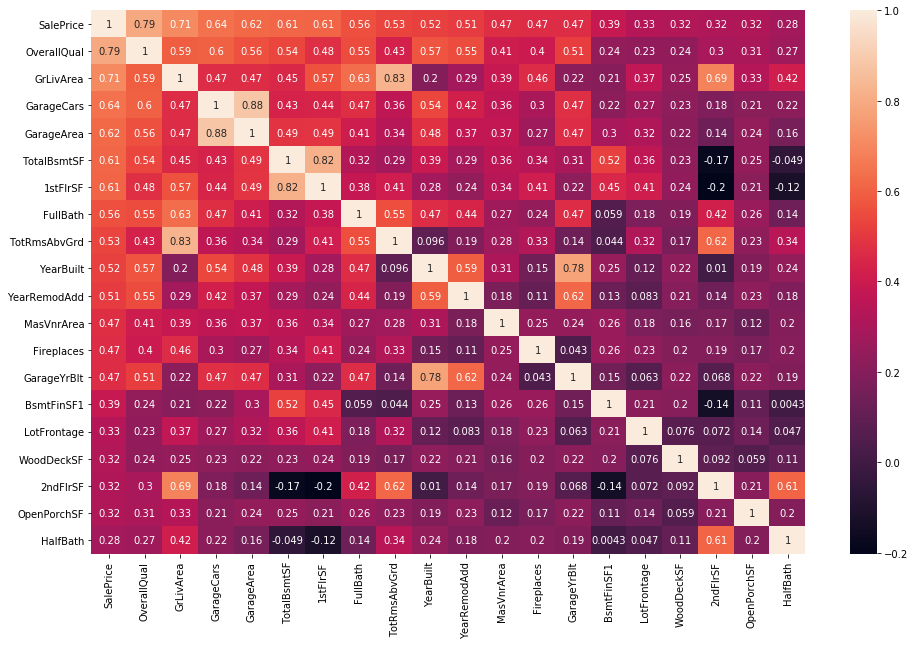

In [29]:
plt.figure(figsize = (16, 10))
n = 20 # number of variables which have the highest correlation with 'Sales price'
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(train[cols].corr(),annot=True)
plt.show()

OverallQual GrLivArea are highly correlated with Saleprie

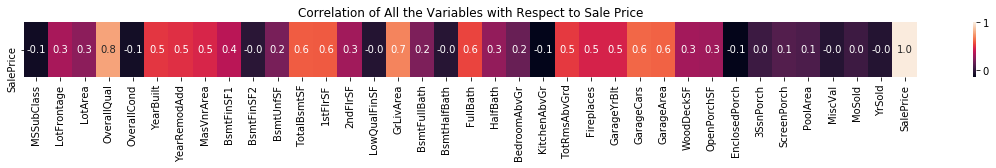

In [30]:
plt.figure(figsize=(20,1))
sns.heatmap(train.corr().sort_values(by=['SalePrice']).tail(1),annot=True,fmt='.1f');
plt.title('Correlation of All the Variables with Respect to Sale Price');

#### Dummying

In [31]:
train_dummies = pd.get_dummies(train.select_dtypes(include=['object']), drop_first=True)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_ALley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No MasVnrType,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No BsmtQual,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No BsmtCond,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No BsmtExposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No BsmtFinType1,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No BsmtFinType2,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electrical,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No GarageType,GarageFinish_No GarageFinish,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No GarageQual,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No GarageCond,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,

In [32]:
train.drop(train.select_dtypes(include=['object']).columns,inplace=True,axis=1)

In [33]:
derivedDF=pd.concat([train, train_dummies], axis=1)

<h5> Outlier Analysis</h5>

In [34]:
def plot_multiple(df,list_of_cols,y):
    print('\x1b[0;4;30;42m' + 'Outlier Analysis on target variable SalePrice' '\x1b[0m')
    plt.figure(figsize=(20,100))
    x=1
    for i in list_of_cols:
        plt.subplot(int(len(list_of_cols)/3)+1,3,x)
        plt.subplots_adjust(wspace=0.4,hspace=1.0)
        sns.scatterplot(x = df[i],y=df[y])
 
        x = x+1
   

Outlier Analysis on target variable SalePrice


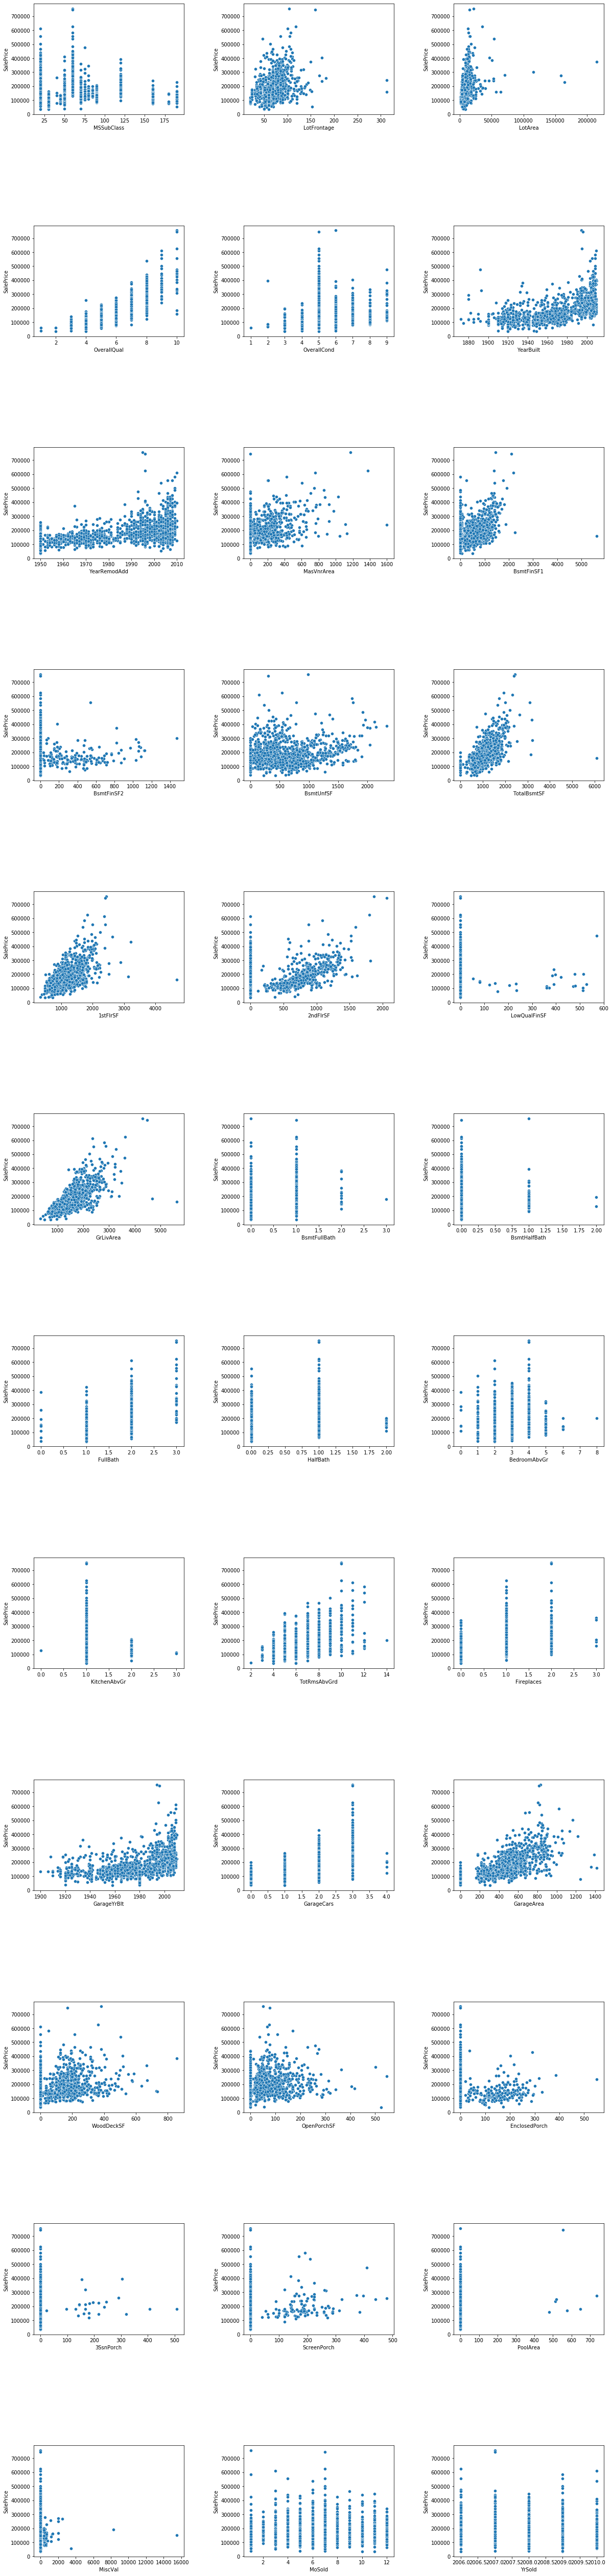

In [35]:
plot_multiple(derivedDF,[a for a in train.columns if a !="SalePrice"],"SalePrice")

As you can see on above charts we have outliers in each feature, so let's use IQR to remove outliers

In [36]:
derivedDF.shape

(1460, 255)

In [37]:
q1 = derivedDF.quantile(0.01)
q3 = derivedDF.quantile(0.99)
iqr=q3-q1

Multiply the interquartile range (IQR) by the number 1.5. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile

In [38]:
iqrdf = derivedDF[~((derivedDF < (q1-1.5*iqr))|(derivedDF>(q3+1.5*iqr))).any(axis=1)]
iqrdf.shape

(1170, 255)

In the outlier treatment we lost almost 20% of data which is bearable, let's use the iqrdf for further analysis

##### Splitting the data into train and test sets

In [39]:
y = np.array(iqrdf.SalePrice)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(iqrdf.drop('SalePrice',axis=1), y,test_size = 0.3, random_state=100)

In [41]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Ridge and Lasso Regression

#### Ridge Regression

In [42]:
parameters= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
import sklearn.model_selection as ms
ridge = Ridge()
ridge_reg=GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5,return_train_score=True)
ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
print('The Best value of Alpha is: ',ridge_reg.best_params_)
print('The Best score achieved : ',ridge_reg.best_score_)

The Best value of Alpha is:  {'alpha': 4.0}
The Best score achieved :  -486612416.58426833


We got best Alpha value 4, we can peform multiple comparison, let's try

In [44]:
ridge_1=Ridge(alpha=0.0001)
ridge_1.fit(x_train,y_train)
y_pred_train=ridge_1.predict(x_train)
y_pred_test=ridge_1.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17476.849265361125
Train R2 Score: 0.9438101624674544
Test R2 Score: 0.9085085809269303
Root Mean Square Error test = 24959.684102708266


In [45]:
ridge_2=Ridge(alpha=1)
ridge_2.fit(x_train,y_train)
y_pred_train=ridge_2.predict(x_train)
y_pred_test=ridge_2.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17610.681572001366
Train R2 Score: 0.9429462986864197
Test R2 Score: 0.9120302121674073
Root Mean Square Error test = 24474.60407003501


#### Alpha=4

In [46]:
ridge_3=Ridge(alpha=4)
ridge_3.fit(x_train,y_train)
y_pred_train=ridge_3.predict(x_train)
y_pred_test=ridge_3.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 17958.7641968881
Train R2 Score: 0.9406686279667492
Test R2 Score: 0.9162667401866021
Root Mean Square Error test = 23877.997485075124


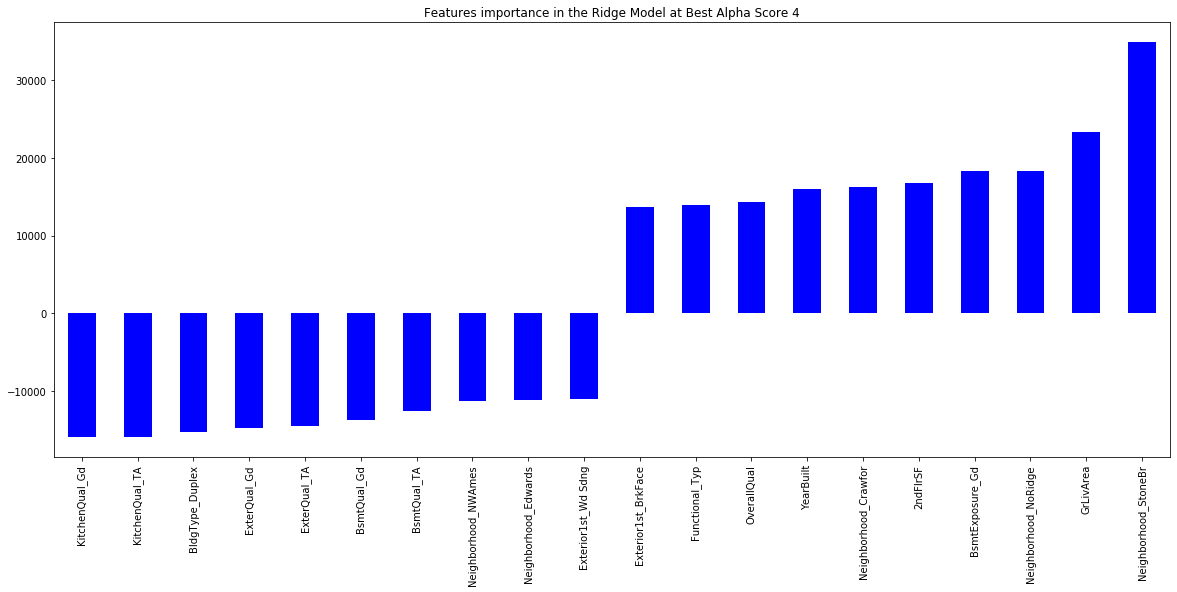

In [47]:
plt.figure(figsize=(20,8))
coefs = pd.Series(ridge_3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Ridge Model at Best Alpha Score 4")
plt.show()

##### Alpha=8  

In [48]:
ridge_4=Ridge(alpha=8)
ridge_4.fit(x_train,y_train)
y_pred_train=ridge_4.predict(x_train)
y_pred_test=ridge_4.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 18386.213666443236
Train R2 Score: 0.9378106380880132
Test R2 Score: 0.9176582194654448
Root Mean Square Error test = 23678.764025635268


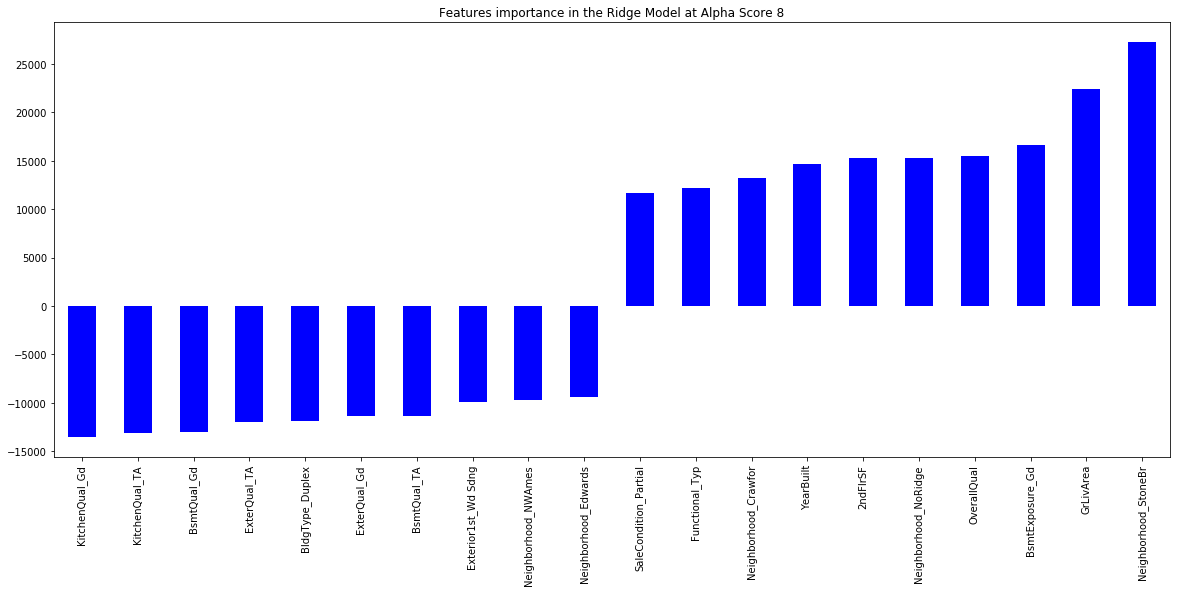

In [49]:
plt.figure(figsize=(20,8))
coefs = pd.Series(ridge_4.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Ridge Model at Alpha Score 8")
plt.show()

Scores Calculation

In [50]:
ridge_df = pd.DataFrame({'Alpha': [0.0001,1,4],'Train Accuracy':[ridge_1.score(x_train,y_train),ridge_2.score(x_train,y_train),ridge_3.score(x_train,y_train)],
                        'Test Accuracy':[ridge_1.score(x_test,y_test),ridge_2.score(x_test,y_test),ridge_3.score(x_test,y_test)]})
ridge_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,0.0001,0.943810,0.908509
1,1.0000,0.942946,0.912030
2,4.0000,0.940669,0.916267


Text(0.5, 1.0, 'Accurcaies on different Alpha values')

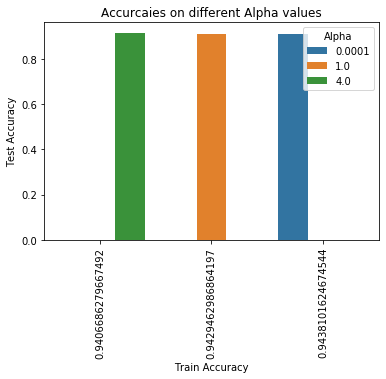

In [51]:

sns.barplot(x = 'Train Accuracy',y='Test Accuracy',hue = 'Alpha',data=ridge_df)
plt.xticks(rotation=90)
plt.title('Accurcaies on different Alpha values')

#### Lasso Regression

In [52]:
lasso = Lasso()
lr = GridSearchCV(estimator = lasso, param_grid = parameters, scoring= 'neg_mean_absolute_error', cv = 5, return_train_score=True,verbose = 1)            
lr.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    9.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [53]:
print('The Best value of Alpha is: ',lr.best_params_)
print('The Best score achieved : ',lr.best_score_)

The Best value of Alpha is:  {'alpha': 100}
The Best score achieved :  -14636.749862243369


In [54]:
alpha =10
lr1 = Lasso(alpha=alpha)
lr1.fit(x_train, y_train) 

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [55]:
y_pred_train=lr1.predict(x_train)
y_pred_test=lr1.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 17620.856554625003
Train R2 Score: 0.942880351423479
Test R2 Score: 0.9105549696941365
Root Mean Square Error test = 24678.968882349796


In [56]:
alpha =50
lr2 = Lasso(alpha=alpha)
lr2.fit(x_train, y_train) 
y_pred_train=lr2.predict(x_train)
y_pred_test=lr2.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 18061.386766325173
Train R2 Score: 0.9399886107503274
Test R2 Score: 0.9174110705713837
Root Mean Square Error test = 23714.273311146993


#### Alpha=100

In [57]:
alpha =100
lr3 = Lasso(alpha=alpha)
lr3.fit(x_train, y_train) 
y_pred_train=lr3.predict(x_train)
y_pred_test=lr3.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 18588.404346171308
Train R2 Score: 0.9364353416330109
Test R2 Score: 0.9200199970129437
Root Mean Square Error test = 23336.708992672837


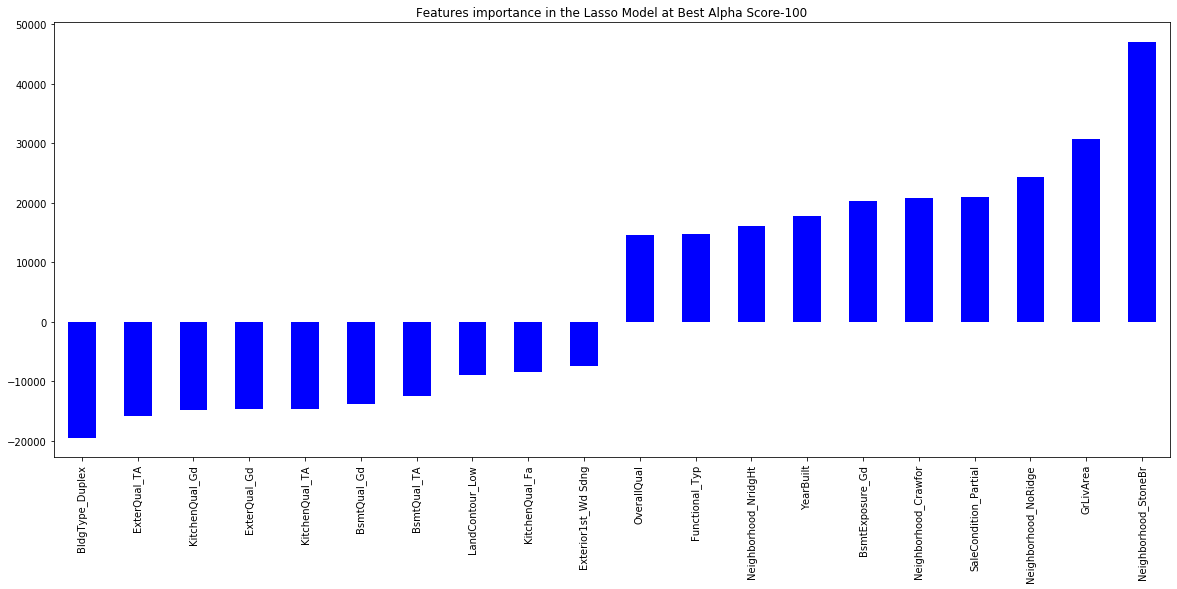

In [58]:
plt.figure(figsize=(20,8))
coefs = pd.Series(lr3.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Lasso Model at Best Alpha Score-100")
plt.show()

#### Alpha 200

In [59]:
alpha =200
lr4 = Lasso(alpha=alpha)
lr4.fit(x_train, y_train) 
y_pred_train=lr4.predict(x_train)
y_pred_test=lr4.predict(x_test)
print('Root Mean Square Error train = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_train, y_pred_train))))
print('Train R2 Score: ' + str(r2_score(y_train,y_pred_train)))
print('Test R2 Score: ' + str(r2_score(y_test,y_pred_test)))
print('Root Mean Square Error test = ' + str(math.sqrt(sklearn_metrics.mean_squared_error(y_test, y_pred_test)))) 


Root Mean Square Error train = 19606.537908849245
Train R2 Score: 0.9292814541172735
Test R2 Score: 0.918135518251033
Root Mean Square Error test = 23610.036638232323


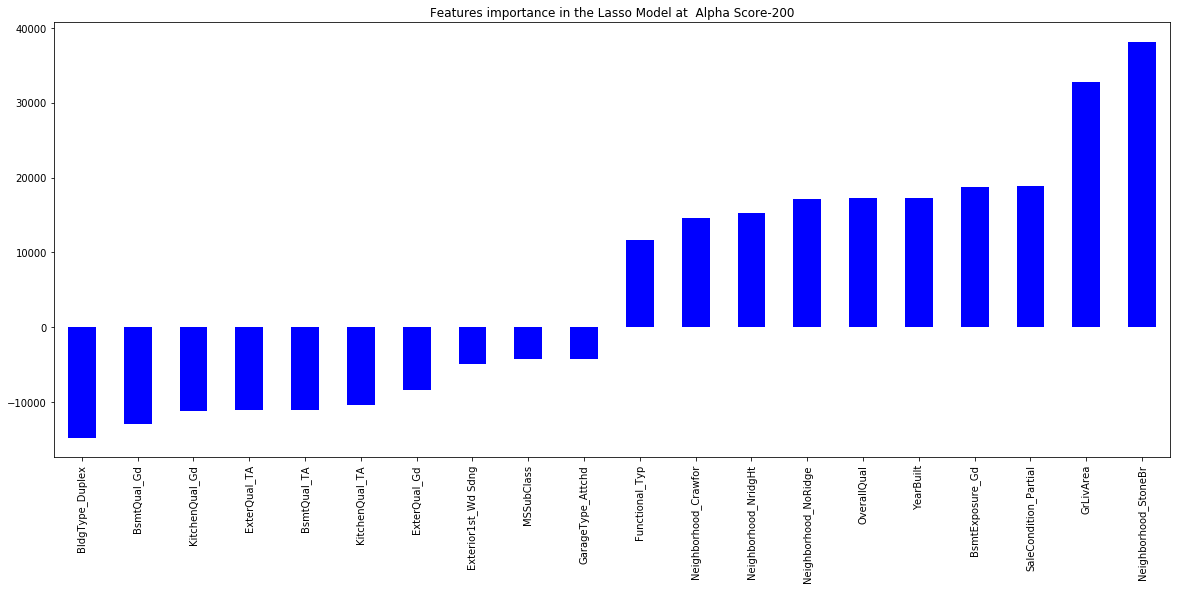

In [60]:
plt.figure(figsize=(20,8))
coefs = pd.Series(lr4.coef_, index = iqrdf.drop('SalePrice',axis=1).columns)
top10 = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
top10.plot(kind = "bar", color='blue')
plt.title("Features importance in the Lasso Model at  Alpha Score-200")
plt.show()

In [61]:
lasso_df = pd.DataFrame({'Alpha': [10,50,100],'Train Accuracy':[lr1.score(x_train,y_train),lr2.score(x_train,y_train),lr3.score(x_train,y_train)],
                        'Test Accuracy':[lr1.score(x_test,y_test),lr2.score(x_test,y_test),lr3.score(x_test,y_test)]})
lasso_df.head()

,Alpha,Train Accuracy,Test Accuracy
0,10,0.942880,0.910555
1,50,0.939989,0.917411
2,100,0.936435,0.920020


Text(0.5, 1.0, 'Accurcaies on different Alpha values on Lasso Model')

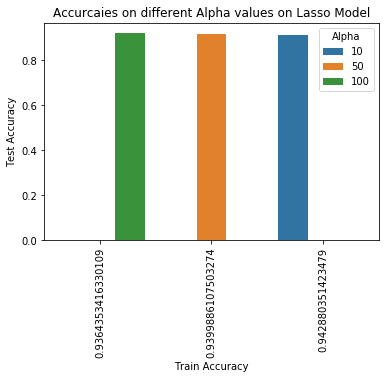

In [62]:

sns.barplot(x = 'Train Accuracy',y='Test Accuracy',hue = 'Alpha',data=lasso_df)
plt.xticks(rotation=90)
plt.title('Accurcaies on different Alpha values on Lasso Model')

#### Which Model to choose Ridge or Lasso?

In [63]:
ridge_results = pd.DataFrame(ridge_reg.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=50]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011284,0.012612,0.000598,0.000488,0.0001,{'alpha': 0.0001},-7.411475e+08,-6.343643e+08,-5.957964e+08,-3.578794e+08,-4.722867e+08,-5.604023e+08,1.328398e+08,24,-2.582792e+08,-2.593812e+08,-2.804548e+08,-3.229301e+08,-2.989358e+08,-2.839962e+08,2.457171e+07
1,0.005179,0.000973,0.000399,0.000488,0.001,{'alpha': 0.001},-7.386588e+08,-6.341580e+08,-5.955654e+08,-3.578043e+08,-4.720953e+08,-5.597633e+08,1.321762e+08,23,-2.582804e+08,-2.593817e+08,-2.804549e+08,-3.229302e+08,-2.989361e+08,-2.839967e+08,2.457142e+07
2,0.004388,0.000488,0.000000,0.000000,0.01,{'alpha': 0.01},-7.227334e+08,-6.322798e+08,-5.933212e+08,-3.570740e+08,-4.704115e+08,-5.552675e+08,1.280321e+08,22,-2.583433e+08,-2.594196e+08,-2.804631e+08,-3.229363e+08,-2.989586e+08,-2.840242e+08,2.455510e+07
3,0.003191,0.000399,0.000199,0.000399,0.05,{'alpha': 0.05},-6.992268e+08,-6.262231e+08,-5.846212e+08,-3.542123e+08,-4.652551e+08,-5.460062e+08,1.222779e+08,21,-2.587623e+08,-2.598058e+08,-2.806177e+08,-3.230558e+08,-2.992007e+08,-2.842885e+08,2.445297e+07
4,0.003591,0.000489,0.000000,0.000000,0.1,{'alpha': 0.1},-6.869430e+08,-6.211966e+08,-5.759318e+08,-3.512668e+08,-4.606108e+08,-5.392857e+08,1.195368e+08,20,-2.593161e+08,-2.603321e+08,-2.809618e+08,-3.233293e+08,-2.995727e+08,-2.847024e+08,2.435376e+07


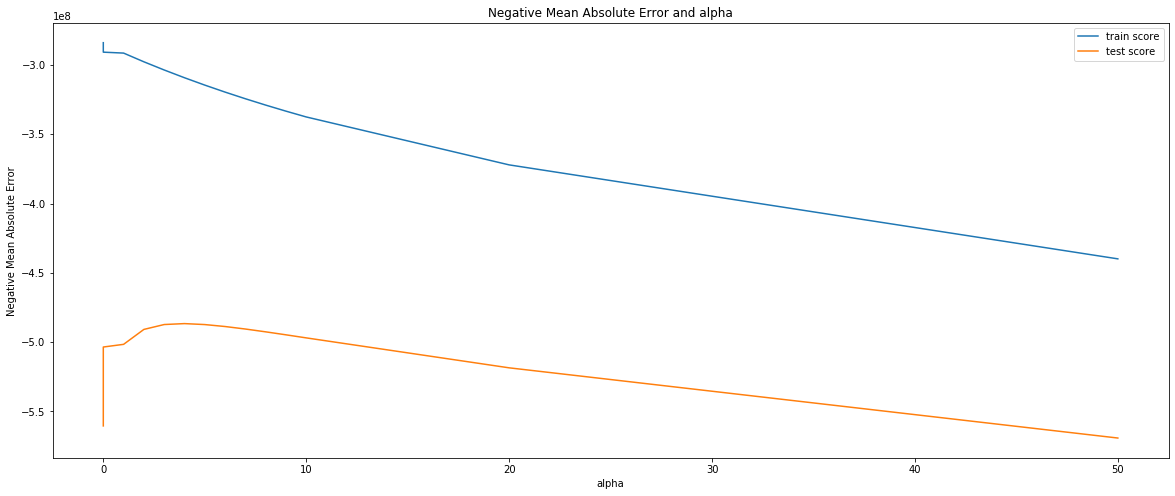

In [64]:
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(20,8))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In the above chart we can see the break on 4, hence Alpha=4 is justified

In [65]:
lr_results = pd.DataFrame(lr.cv_results_)
lr_results = lr_results[lr_results['param_alpha']<=400]
lr_results.head()



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072006,0.012700,0.000000,0.000000,0.0001,{'alpha': 0.0001},-17106.587888,-16481.899832,-17445.832830,-14636.144364,-16322.078847,-16398.602073,971.875647,26,-11156.899264,-11180.222152,-11462.399568,-12283.855011,-11712.989044,-11559.273008,415.599890
1,0.062832,0.008673,0.000399,0.000489,0.001,{'alpha': 0.001},-17106.965222,-16481.250793,-17445.766936,-14635.621155,-16322.044377,-16398.422841,972.095914,25,-11156.911279,-11180.219085,-11462.394135,-12283.858240,-11712.987696,-11559.274087,415.599403
2,0.062433,0.008263,0.000200,0.000399,0.01,{'alpha': 0.01},-17110.712290,-16474.760270,-17445.098356,-14631.417379,-16321.655728,-16396.820469,973.925023,24,-11157.031342,-11180.212797,-11462.389793,-12283.891447,-11712.992692,-11559.303614,415.589455
3,0.064627,0.001715,0.000798,0.000399,0.05,{'alpha': 0.05},-17098.245370,-16445.926001,-17442.141627,-14613.453939,-16319.855402,-16384.002696,977.588368,23,-11157.602999,-11180.454178,-11462.374719,-12284.041674,-11713.076212,-11559.509956,415.494054
4,0.065336,0.009188,0.000398,0.000488,0.1,{'alpha': 0.1},-17079.893222,-16436.270859,-17438.669788,-14592.513394,-16316.919065,-16372.921562,981.681002,22,-11158.234629,-11180.856873,-11462.611350,-12284.788696,-11713.528661,-11560.004042,415.581322


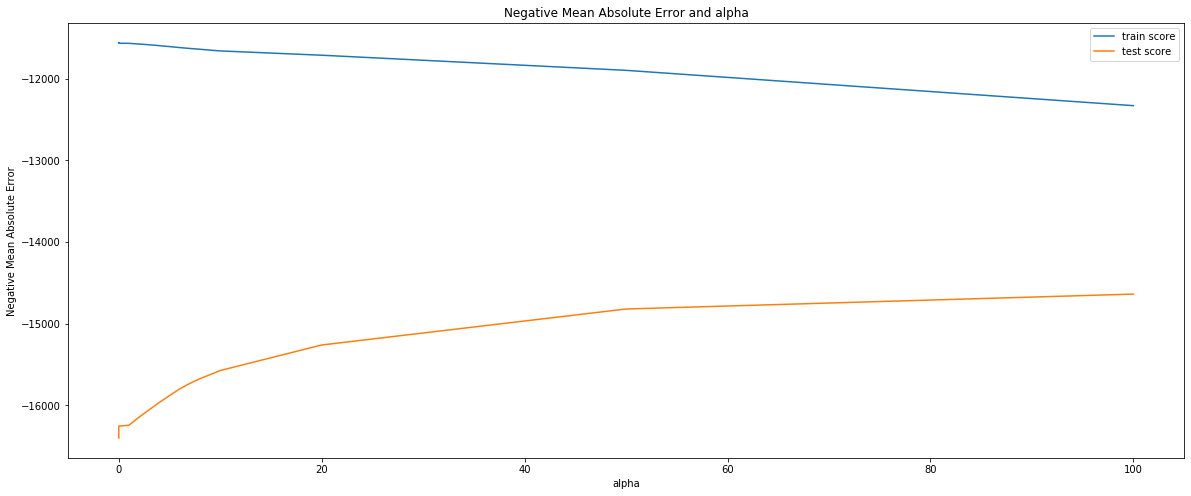

In [66]:
lr_results['param_alpha'] = lr_results['param_alpha'].astype('int32')
plt.figure(figsize=(20,8))
plt.plot(lr_results['param_alpha'], lr_results['mean_train_score'])
plt.plot(lr_results['param_alpha'], lr_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

By Looking into the both charts we can clearly see that Lasso will give us more generalised Train and Test accuracy, Hence we will choose Lasso Regression.